In [1]:
#!pip install -U 'grandiso>=2.2.0'
#!pip install grand-cypher
#!pip install python-louvain 

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from grandcypher import GrandCypher
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import community  

In [3]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Basic EDA
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average clustering coefficient:", nx.average_clustering(G))


Number of nodes: 34
Number of edges: 78
Average clustering coefficient: 0.5706384782076823


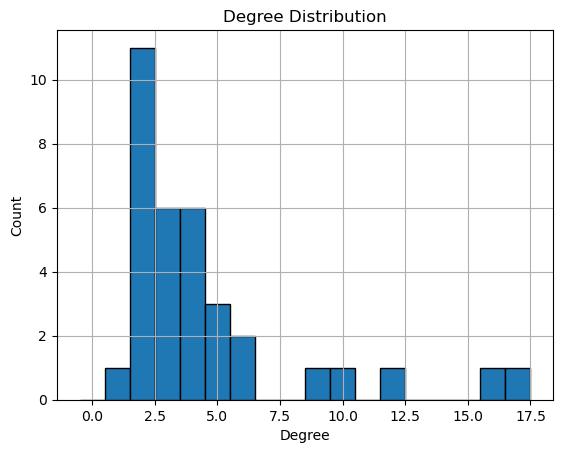

In [4]:
# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.hist(degree_sequence, bins=np.arange(max(degree_sequence)+2)-0.5, edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [5]:
# Convert the graph to a DataFrame
df = pd.DataFrame(G.nodes(data=True), columns=['Node', 'Attributes'])

# Display the DataFrame
print(df)

    Node           Attributes
0      0   {'club': 'Mr. Hi'}
1      1   {'club': 'Mr. Hi'}
2      2   {'club': 'Mr. Hi'}
3      3   {'club': 'Mr. Hi'}
4      4   {'club': 'Mr. Hi'}
5      5   {'club': 'Mr. Hi'}
6      6   {'club': 'Mr. Hi'}
7      7   {'club': 'Mr. Hi'}
8      8   {'club': 'Mr. Hi'}
9      9  {'club': 'Officer'}
10    10   {'club': 'Mr. Hi'}
11    11   {'club': 'Mr. Hi'}
12    12   {'club': 'Mr. Hi'}
13    13   {'club': 'Mr. Hi'}
14    14  {'club': 'Officer'}
15    15  {'club': 'Officer'}
16    16   {'club': 'Mr. Hi'}
17    17   {'club': 'Mr. Hi'}
18    18  {'club': 'Officer'}
19    19   {'club': 'Mr. Hi'}
20    20  {'club': 'Officer'}
21    21   {'club': 'Mr. Hi'}
22    22  {'club': 'Officer'}
23    23  {'club': 'Officer'}
24    24  {'club': 'Officer'}
25    25  {'club': 'Officer'}
26    26  {'club': 'Officer'}
27    27  {'club': 'Officer'}
28    28  {'club': 'Officer'}
29    29  {'club': 'Officer'}
30    30  {'club': 'Officer'}
31    31  {'club': 'Officer'}
32    32  

### Centrality

In [6]:
# Identify users with the highest number of connections (followers or followees).
degree_centrality = nx.degree_centrality(G)
degree_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [7]:
#how close a node is to all other nodes in a graph, based on the length of the shortest paths between the node and all other nodes.
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [8]:
#how central a node is in a network based on the number of shortest paths that pass through that node
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

#### Clique

A clique (a fully connected subgraph) is a subset of vertices within a graph where every vertex is connected to every other vertex in the subset. 
Formally, a clique of size k in a graph is a subset of vertices such that every pair of vertices in the subset is connected by an edge, and the size of the subset is k.

    Complete Subgraph: A clique forms a complete subgraph within the larger graph, meaning that every vertex in the subset is adjacent to every other vertex in the subset.

    Size: The size of a clique is defined by the number of vertices it contains. A clique with two vertices is called a 2-clique or an edge, while a clique with three vertices is called a 3-clique, and so on.

    Maximal Clique: A maximal clique is a clique that cannot be extended by adding any more vertices from the graph without violating the property of being a clique.

In [9]:
#Find cliques (complete subgraphs) in the graph
maximal_cliques = list(nx.find_cliques(G))
print("Cliques:", maximal_cliques)

Cliques: [[0, 1, 17], [0, 1, 2, 3, 13], [0, 1, 2, 3, 7], [0, 1, 19], [0, 1, 21], [0, 4, 10], [0, 4, 6], [0, 5, 10], [0, 5, 6], [0, 8, 2], [0, 11], [0, 12, 3], [0, 31], [1, 30], [2, 32, 8], [2, 9], [2, 27], [2, 28], [5, 16, 6], [33, 32, 8, 30], [33, 32, 14], [33, 32, 15], [33, 32, 18], [33, 32, 20], [33, 32, 22], [33, 32, 23, 29], [33, 32, 31], [33, 9], [33, 13], [33, 19], [33, 26, 29], [33, 27, 23], [33, 28, 31], [24, 25, 31], [24, 27], [25, 23]]


/var/folders/dr/_x17x1d14k3614c36x1bhwbh0000gn/T/ipykernel_4321/1738730331.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


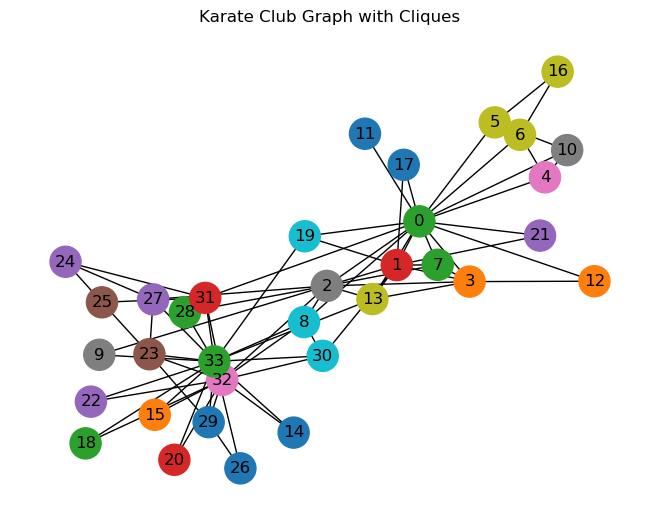

In [10]:
# Create a new graph to visualize cliques
cliques_graph = nx.Graph()

# Find all maximal cliques in the graph
maximal_cliques = list(nx.find_cliques(G))

# Create a new graph to visualize cliques
cliques_graph = nx.Graph()

# Get a colormap with enough colors for the cliques
cmap = get_cmap('tab10')  
num_colors = len(maximal_cliques)
colors = [cmap(i % 10) for i in range(num_colors)]  # Ensure we have enough distinct colors

# Assign a unique color to each clique
color_map = {}
for i, clique in enumerate(maximal_cliques):
    for node in clique:
        color_map[node] = colors[i]

# Draw the original graph with nodes colored by clique
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=[color_map[node] for node in G.nodes()], node_size=500)

# Show the plot
plt.title('Karate Club Graph with Cliques')
plt.show()

In [11]:
#Find connected components in the graph
connected_components = list(nx.connected_components(G))
print("Connected components:", connected_components)

Connected components: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


In [12]:
#Find shortest paths between all nodes in the graph
shortest_paths = dict(nx.shortest_path(G))
print("Shortest paths:", shortest_paths)

Shortest paths: {0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 10: [0, 10], 11: [0, 11], 12: [0, 12], 13: [0, 13], 17: [0, 17], 19: [0, 19], 21: [0, 21], 31: [0, 31], 30: [0, 1, 30], 9: [0, 2, 9], 27: [0, 2, 27], 28: [0, 2, 28], 32: [0, 2, 32], 16: [0, 5, 16], 33: [0, 8, 33], 24: [0, 31, 24], 25: [0, 31, 25], 23: [0, 2, 27, 23], 14: [0, 2, 32, 14], 15: [0, 2, 32, 15], 18: [0, 2, 32, 18], 20: [0, 2, 32, 20], 22: [0, 2, 32, 22], 29: [0, 2, 32, 29], 26: [0, 8, 33, 26]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 13: [1, 13], 17: [1, 17], 19: [1, 19], 21: [1, 21], 30: [1, 30], 4: [1, 0, 4], 5: [1, 0, 5], 6: [1, 0, 6], 8: [1, 0, 8], 10: [1, 0, 10], 11: [1, 0, 11], 12: [1, 0, 12], 31: [1, 0, 31], 9: [1, 2, 9], 27: [1, 2, 27], 28: [1, 2, 28], 32: [1, 2, 32], 33: [1, 13, 33], 16: [1, 0, 5, 16], 24: [1, 0, 31, 24], 25: [1, 0, 31, 25], 23: [1, 2, 27, 23], 14: [1, 2, 32, 14], 15: [1, 2, 32, 15], 18: [1, 2, 32, 18], 20: [1, 2, 32, 

### Community

In [13]:
# Community detection using the Louvain method
partition = community.best_partition(G)

In [14]:
# Organize nodes into clusters based on the partition
clusters = {}
for node, cluster_id in partition.items():
    if cluster_id not in clusters:
        clusters[cluster_id] = [node]
    else:
        clusters[cluster_id].append(node)

# Print the clusters
for cluster_id, nodes in clusters.items():
    print(f"Cluster {cluster_id}: {nodes}")

Cluster 0: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
Cluster 2: [4, 5, 6, 10, 16]
Cluster 3: [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]
Cluster 1: [23, 24, 25, 27, 28, 31]


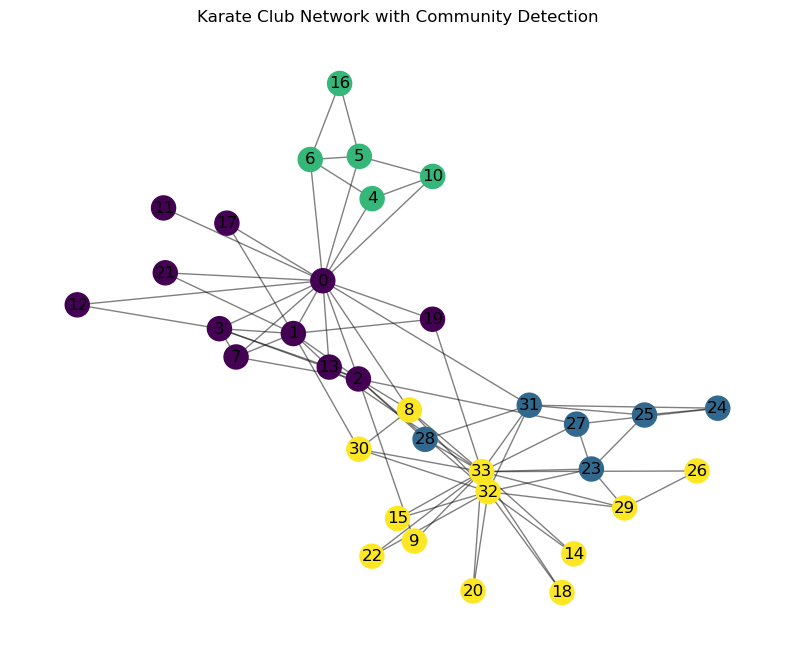

In [15]:
# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
plt.figure(figsize=(10, 8))

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.cm.viridis, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos)

plt.title("Karate Club Network with Community Detection")
plt.axis("off")
plt.show()

In [16]:
#!pip install grand-cypher

### Cypher Queries

In [24]:
GrandCypher(G).run("""
MATCH (A)-[]->(B)
MATCH (B)-[]->(C)
WHERE A.club == "Mr. Hi"
RETURN B.club
""")

{'B.club': ['Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Officer',
  'Officer',
  'Officer',
  'Officer',
  'Officer',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
  'Mr. Hi',
 